<center>

# _Decision Trees & Random Forests_

</center>

<center>
    
## A_Patnaik_M11_Assignment

</center>

# Introduction:

In this assignment, we are tasked with utilizing decision trees and random forests to address a classification problem using a dataset provided. The problem involves predicting the level of regents diplomas awarded across different school districts and student subgroupings based on various features available in the dataset.

**Steps Planned to Address the Problem:**

* Data Loading and Exploration
* Exploratory Data Analysis
* Preprocessing
* Post EDA Data preparation
* Feature Engineering
* Feature Selection
* Model Training (Decision Trees and Random Forests)
* Model Evaluation
* Model Selection
* Conclusion
* Final Observation

## Data Loading & Exploration

In [1]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [2]:
# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/Ansuman21/Data-Science-M11-Decision-Trees-Random-Forests/main/M11_Data.csv"

# Read the data into a Pandas DataFrame
df = pd.read_csv(url)

# Display the first few rows of the DataFrame to ensure it's properly loaded
df.head().T

,0,1,2,3,4
report_school_year,2018-19,2018-19,2018-19,2018-19,2018-19
aggregation_index,3,3,3,3,3
aggregation_type,District,District,District,District,District
aggregation_name,ALBANY CITY SCHOOL DISTRICT,ALBANY CITY SCHOOL DISTRICT,ALBANY CITY SCHOOL DISTRICT,ALBANY CITY SCHOOL DISTRICT,ALBANY CITY SCHOOL DISTRICT
nrc_code,3,3,3,3,3
nrc_desc,Urban-Suburban High Needs,Urban-Suburban High Needs,Urban-Suburban High Needs,Urban-Suburban High Needs,Urban-Suburban High Needs
county_code,1,1,1,1,1
county_name,ALBANY,ALBANY,ALBANY,ALBANY,ALBANY
nyc_ind,0,0,0,0,0
membership_desc,2013 Total Cohort - 6 Year Outcome,2013 Total Cohort - 6 Year Outcome,2013 Total Cohort - 6 Year Outcome,2013 Total Cohort - 6 Year Outcome,2013 Total Cohort - 6 Year Outcome


#### Inference
The dataset was loaded from the provided URL, and it contained information regarding regents diplomas awarded across different school districts and student subgroupings. Upon loading the data into a Pandas DataFrame, an initial exploration was conducted by examining the first few rows of the DataFrame. From this initial inspection, it was observed that the dataset consists of various features such as enrollment count, graduation count, graduation percentage, dropout count, as well as categorical variables like aggregation name, county code, membership description, and subgroup name. Each row in the dataset represents a specific school district or student subgrouping.

In [3]:
# View the number of rows and columns
df.shape

(73152, 19)

#### Inference
The dataset consisted of 73,152 rows and 19 columns, indicating a substantial amount of data for analysis.

In [4]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   report_school_year  73152 non-null  object
 1   aggregation_index   73152 non-null  int64 
 2   aggregation_type    73152 non-null  object
 3   aggregation_name    73152 non-null  object
 4   nrc_code            73152 non-null  int64 
 5   nrc_desc            73152 non-null  object
 6   county_code         73152 non-null  int64 
 7   county_name         73152 non-null  object
 8   nyc_ind             73152 non-null  int64 
 9   membership_desc     73152 non-null  object
 10  subgroup_code       73152 non-null  int64 
 11  subgroup_name       73152 non-null  object
 12  enroll_cnt          73152 non-null  object
 13  grad_cnt            73152 non-null  object
 14  grad_pct            73152 non-null  object
 15  reg_cnt             73152 non-null  object
 16  reg_pct             73

#### Inference
The dataset contained information about educational institutions with a total of 73,152 entries and 19 columns. These columns included various features such as school year, aggregation index, aggregation type, county information, membership description, subgroup details, enrollment count, graduation count, graduation percentage, registration count, dropout count, and dropout percentage. The data types ranged from integers to objects, indicating a mix of numerical and categorical variables.

## Exploratory Data Analysis (EDA)

In [5]:
# Summary statistics for numerical variables
df.describe()

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code
count,73152.0,73152.000000,73152.000000,73152.000000,73152.000000
mean,3.0,4.588583,36.251859,0.055255,12.000930
std,0.0,1.203507,20.588044,0.228479,7.213138
min,3.0,1.000000,1.000000,0.000000,1.000000
25%,3.0,4.000000,17.000000,0.000000,6.000000
50%,3.0,5.000000,40.000000,0.000000,11.000000
75%,3.0,5.000000,57.000000,0.000000,18.000000
max,3.0,6.000000,68.000000,1.000000,25.000000


#### Inference
The summary statistics for the numerical variables revealed that the 'aggregation_index' column had a constant value of 3 across all entries. The mean values for 'nrc_code', 'county_code', and 'subgroup_code' were approximately 4.59, 36.25, and 12.00, respectively. Standard deviations varied across these numerical columns, indicating the dispersion of data around the mean. Additionally, the minimum and maximum values provided insights into the range of values present in each column, while quartiles highlighted the distribution of data within each variable.

In [6]:
# Unique values and their counts for categorical variables
df.nunique()

report_school_year       1
aggregation_index        1
aggregation_type         1
aggregation_name       680
nrc_code                 6
nrc_desc                 6
county_code             62
county_name             62
nyc_ind                  2
membership_desc          6
subgroup_code           24
subgroup_name           24
enroll_cnt            1464
grad_cnt              1715
grad_pct               101
reg_cnt               1290
reg_pct                102
dropout_cnt            445
dropout_pct             81
dtype: int64

#### Inference
The analysis of unique values and their counts for categorical variables showed that there was only one unique value present in the 'report_school_year', 'aggregation_index', and 'aggregation_type' columns, indicating that these columns might not provide useful information for analysis. The 'aggregation_name' column had 680 unique values, suggesting a wide range of categories within this attribute. Other categorical variables such as 'nrc_desc', 'county_name', 'membership_desc', and 'subgroup_name' exhibited varying numbers of unique values, providing insights into the diversity of categories present in the dataset.

In [7]:
# Check for missing values
print(df.isnull().sum())

report_school_year    0
aggregation_index     0
aggregation_type      0
aggregation_name      0
nrc_code              0
nrc_desc              0
county_code           0
county_name           0
nyc_ind               0
membership_desc       0
subgroup_code         0
subgroup_name         0
enroll_cnt            0
grad_cnt              0
grad_pct              0
reg_cnt               0
reg_pct               0
dropout_cnt           0
dropout_pct           0
dtype: int64


#### Inference
The examination for missing values indicated that there were no null values present across any of the columns in the dataset. All columns had a count of 0 for missing values, suggesting that the dataset was complete and did not require imputation or handling of missing data.

In [8]:
# Frequency distribution of categorical variables
for col in df.select_dtypes(include=['object']):
    print(df[col].value_counts())

2018-19    73152
Name: report_school_year, dtype: int64
District    73152
Name: aggregation_type, dtype: int64
KINGSTON CITY SCHOOL DISTRICT                           138
WILLIAMSVILLE CENTRAL SCHOOL DISTRICT                   136
GREECE CENTRAL SCHOOL DISTRICT                          134
RIVERHEAD CENTRAL SCHOOL DISTRICT                       134
KENMORE-TONAWANDA UNION FREE SCHOOL DISTRICT            134
                                                       ... 
LONG LAKE CENTRAL SCHOOL DISTRICT                        70
KIRYAS JOEL VILLAGE UNION FREE SCHOOL DISTRICT           66
GREENBURGH-NORTH CASTLE UNION FREE SCHOOL DISTRICT       56
MOUNT PLEASANT-BLYTHEDALE UNION FREE SCHOOL DISTRICT     48
RANDOLPH ACADEMY UNION FREE SCHOOL DISTRICT              40
Name: aggregation_name, Length: 680, dtype: int64
Average Needs                            35322
Rural High Needs                         14968
Low Needs                                13068
Urban-Suburban High Needs             

#### Inference
* The dataset contained information for the school year 2018-19, with one aggregation index and aggregation type (district).
* There were 680 unique aggregation names present in the dataset, representing various school districts.
* Six unique NRC (Need/Resource Category) descriptions were identified, with 'Average Needs' being the most frequent.
* The dataset covered 62 different counties, with Suffolk having the highest frequency of occurrences.
* Membership descriptions indicated different cohort outcomes, such as 4-year and 5-year outcomes, with similar frequencies.
* Subgroup names represented various student demographics and characteristics, with 'All Students' being the most frequent.
* The 'enroll_cnt', 'grad_cnt', 'reg_cnt', 'dropout_cnt' columns had numeric values, but a considerable number of entries were represented by '-' indicating missing or unavailable data.
* Graduation percentages ('grad_pct') and dropout percentages ('dropout_pct') ranged from 0% to 100%, with '-' representing missing values and various percentages having different frequencies of occurrence.

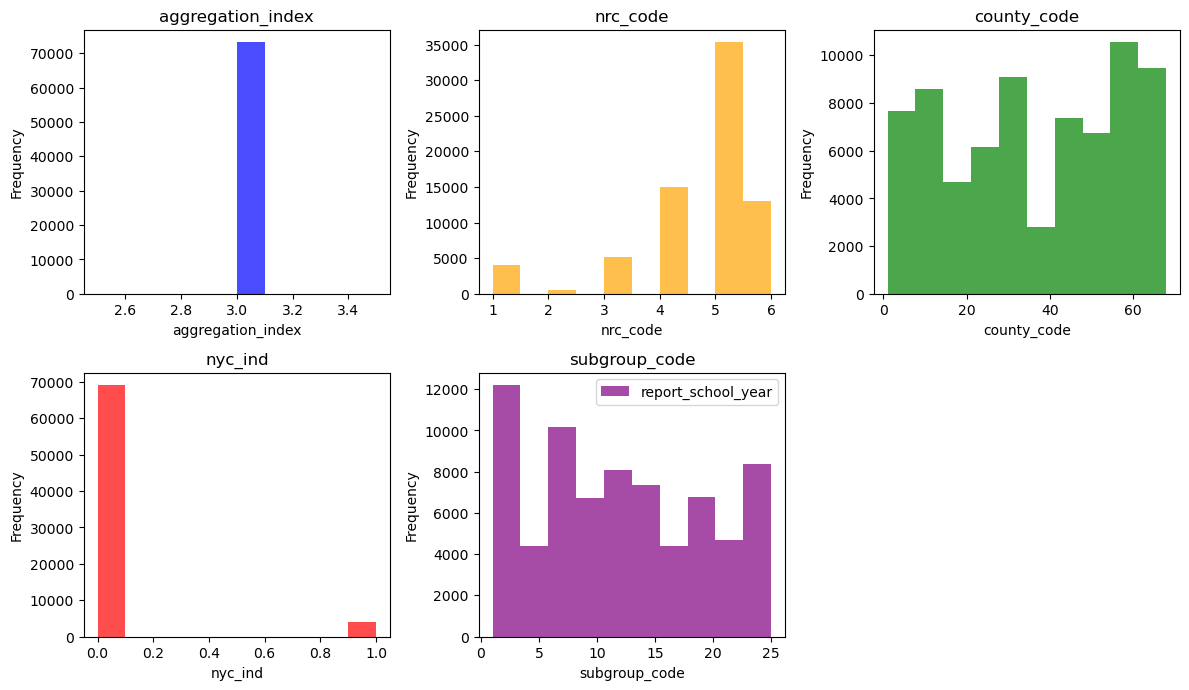

In [9]:
# Define colors for the histograms
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

# Histograms for numerical variables
plt.figure(figsize=(12, 10))
for i, column in enumerate(df.select_dtypes(include=['int64', 'float64'])):
    plt.subplot(3, 3, i+1)
    plt.hist(df[column], color=colors[i], alpha=0.7)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.legend(df.columns, loc='best')
plt.show()

#### Inference
* **aggregation_index:** The histogram indicated a heavily concentrated distribution around a single value, likely between 3.0 and 3.2, suggesting minimal variation in aggregation index across observations.
* **nrc_code:** Showed a descending pattern with the highest frequency at the lowest code value, indicating that the first nrc_code was the most common in the dataset.
* **county_code:** Exhibited a relatively uniform distribution across various county codes, implying an even spread of data among different counties.
* **nyc_ind:** Demonstrated a very high frequency for a value around 0, suggesting that the dataset predominantly consisted of observations not associated with New York City.
* **subgroup_code:** Showed varied frequencies across different codes without a clear ascending or descending trend, indicating a diverse distribution of data among subgroup codes.

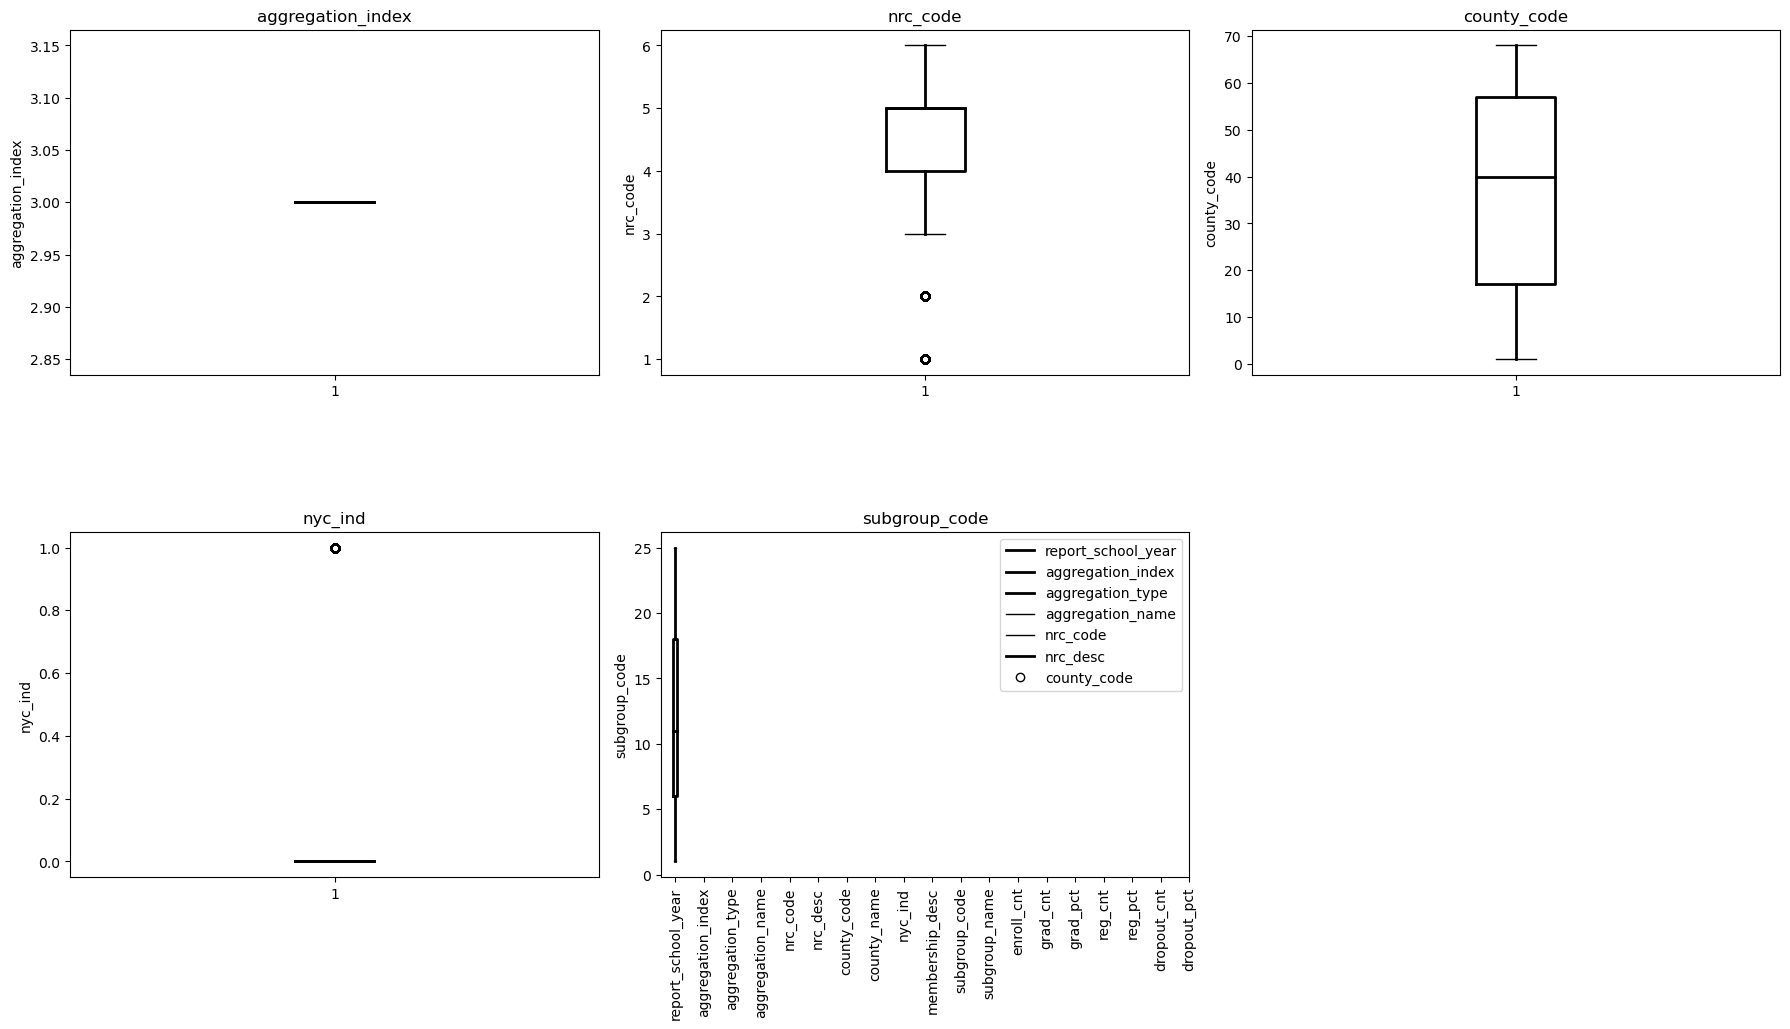

In [10]:
# Define colors for the box plots
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']

# Box plots for numerical variables
plt.figure(figsize=(18, 14))
boxprops = dict(color='black', linewidth=2)
whiskerprops = dict(color='black', linewidth=2)
medianprops = dict(color='black', linewidth=2)
for i, column in enumerate(df.select_dtypes(include=['int64', 'float64'])):
    plt.subplot(3, 3, i+1)
    plt.boxplot(df[column], boxprops=boxprops, whiskerprops=whiskerprops, medianprops=medianprops)
    plt.title(column)
    plt.ylabel(column)
plt.xticks(range(1, len(df.columns) + 1), df.columns, rotation=90) 
plt.tight_layout()
plt.legend(df.columns, loc='best')
plt.show()

#### Inference
* **aggregation_index:** Showed minimal variation with a narrow distribution around 3.0, indicating a constant or nearly constant value across the dataset.
* **nrc_code:** Revealed a wider range of values with a median around 2, and presence of outliers, suggesting variability with some values significantly different from the majority.
* **county_code:** Displayed a wide distribution of values with a median around 30 and no outliers, indicating geographic diversity with all codes falling within a predictable range.
* **nyc_ind:** Mostly clustered at 0 with one outlier at 1, suggesting that 'nyc_ind' is rarely set to 1, possibly indicating a binary or flag variable.
* **subgroup_code:** Presented as a bar chart showing frequencies of different codes, indicating which codes are most prevalent in the dataset, potentially reflecting the structure or design of the data collection process.

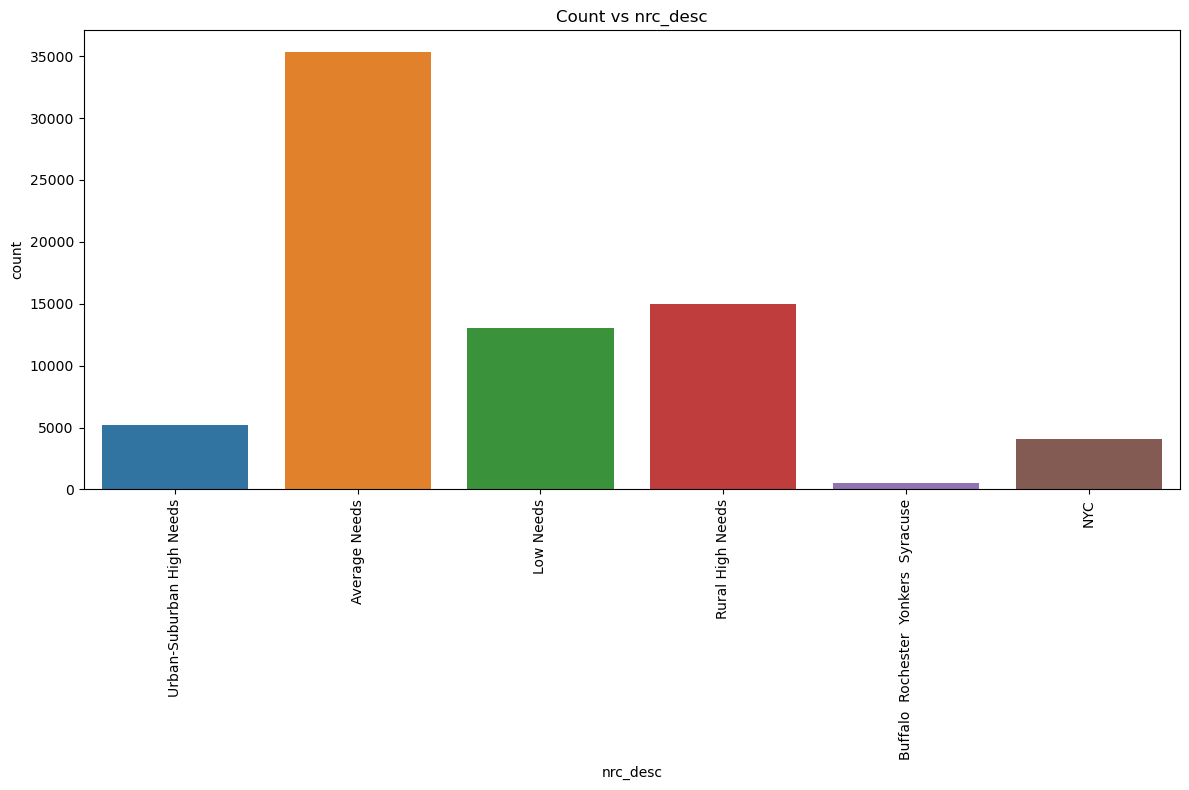

In [11]:
# Bar plots for count vs nrc_desc
plt.figure(figsize=(12, 8))
sns.countplot(x='nrc_desc', data=df)
plt.title('Count vs nrc_desc')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Inference
* "Average Needs" had the highest count, exceeding 30,000, indicating it was the most common category.
* "Rural High Needs" followed with a count around 15,000, suggesting a substantial presence but less prevalent than "Average Needs".
* "NYC" and "Buffalo/Rochester/Syracuse" had significantly lower counts, both below 5,000, indicating they were less common categories.
* Insights suggested that resources and strategies might need to be tailored differently based on the prevalence of each category.
* Understanding the distribution of counts across categories could inform resource allocation and targeted interventions.

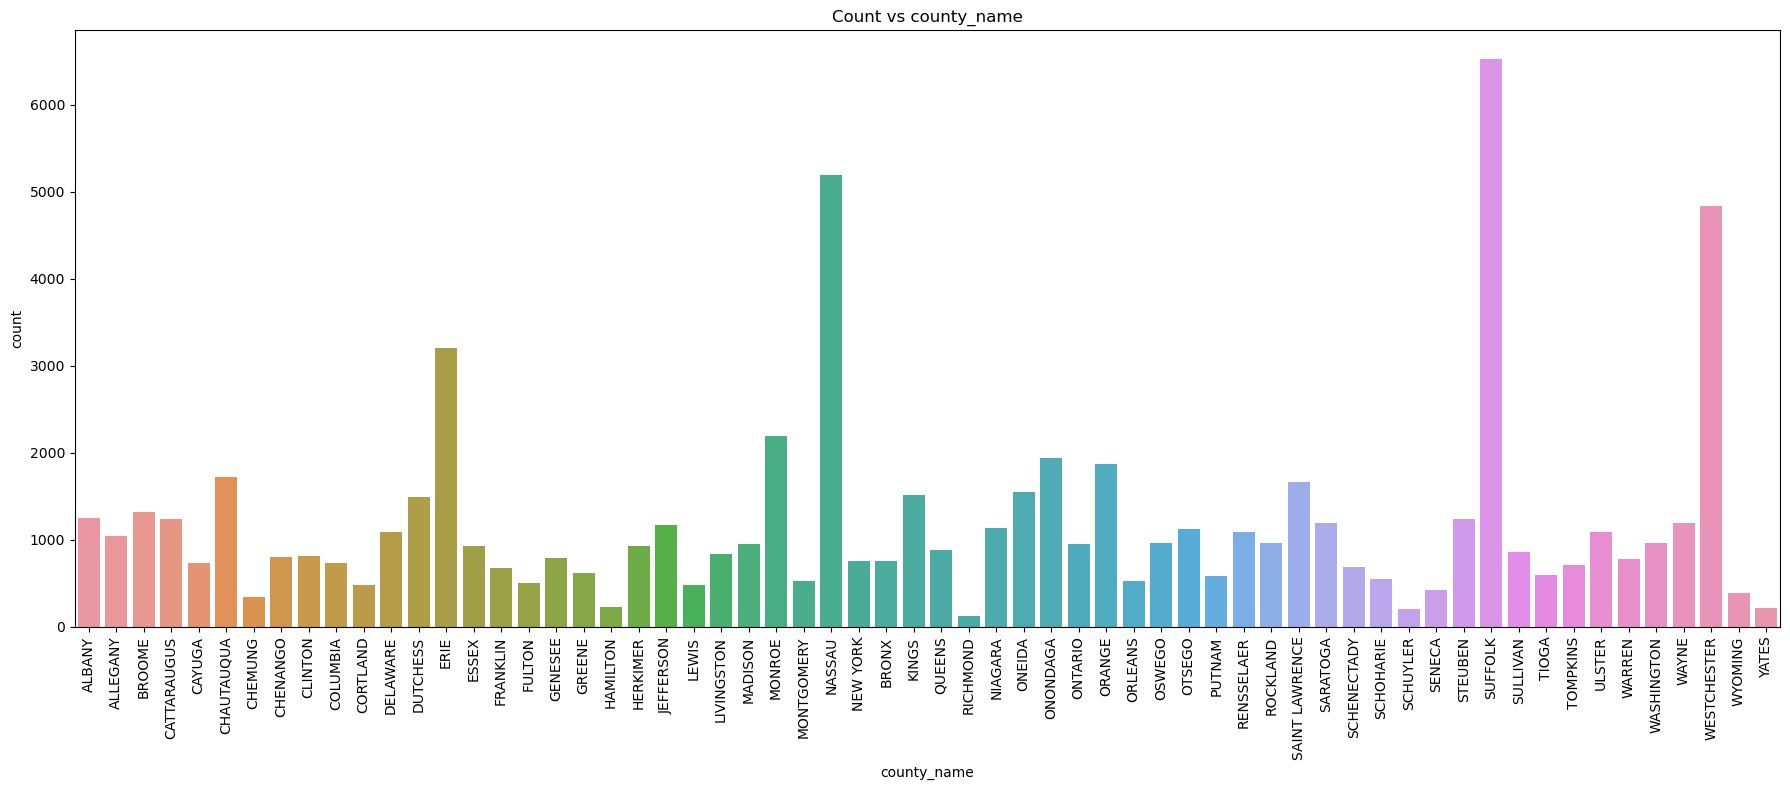

In [12]:
# Bar plots for count vs county_name
plt.figure(figsize=(18, 8))
sns.countplot(x='county_name', data=df)
plt.title('Count vs county_name')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Inference
* Significant variation observed in counts between counties, with some having very high counts and others much lower.
* The county with the highest count surpassed 6000, standing out prominently.
* Numerous counties had counts close to zero, indicating fewer incidences or smaller populations.
* Insights drawn depend on what the "count" represents, potentially informing resource allocation or intervention strategies.
* Decision-making could prioritize counties based on high or low counts, addressing disparities or focusing interventions where needed.

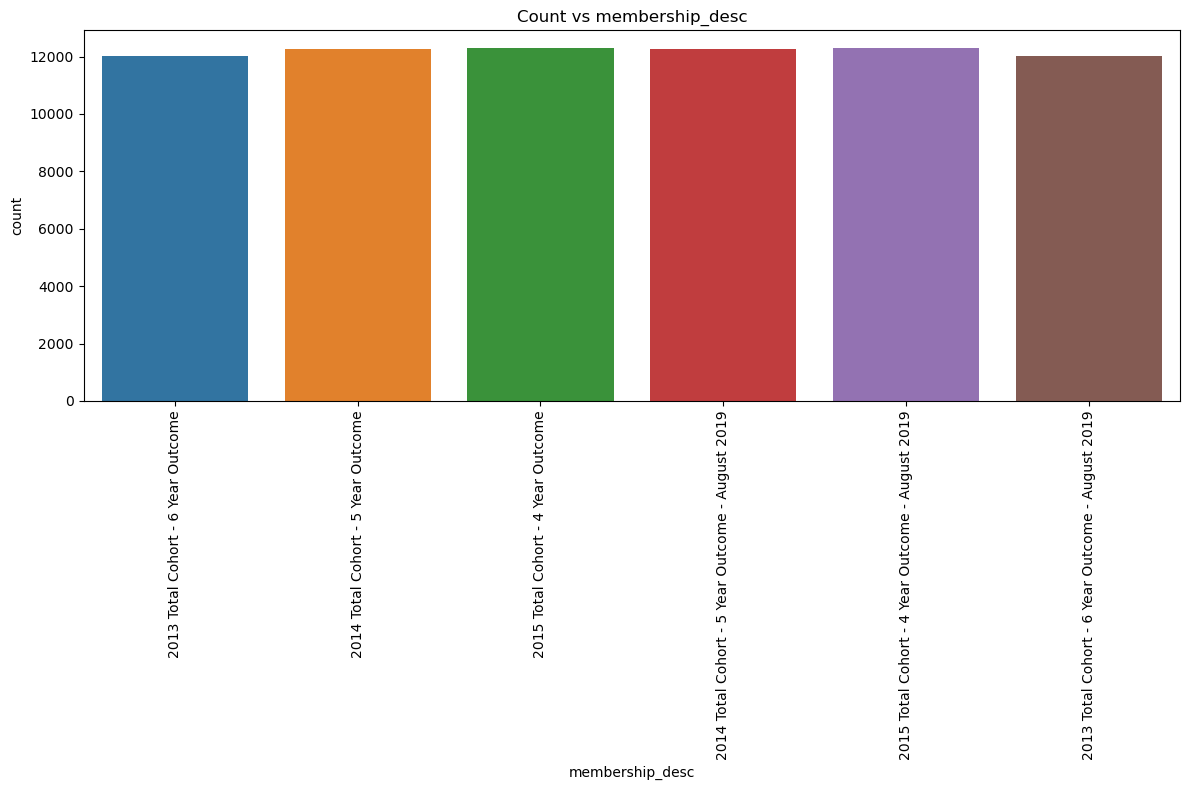

In [13]:
# Bar plots for count vs membership_desc
plt.figure(figsize=(12, 8))
sns.countplot(x='membership_desc', data=df)
plt.title('Count vs membership_desc')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Inference
* The chart displayed counts across different 'membership_desc' categories, likely representing cohorts from 2013, 2014, and 2015 with their respective outcomes.
* Initial cohort years (2013, 2014, 2015) showed similar counts, indicating stable membership or participation levels.
* 'Outcome' categories four years later exhibited lower counts compared to the initial cohorts, implying attrition or drop-off over time.
* The 2013 cohort had the highest initial count, while its outcome count was the lowest among the 'outcome' categories.
* Insights suggest investigating factors contributing to declines in counts over the four-year period and developing strategies to improve retention or engagement.
* The data could inform decision-making by identifying areas for improvement in retention strategies and guiding resource allocation for maximizing outcomes.
* Limitations include the lack of context about 'membership_desc', methodology details, and external factors influencing counts.

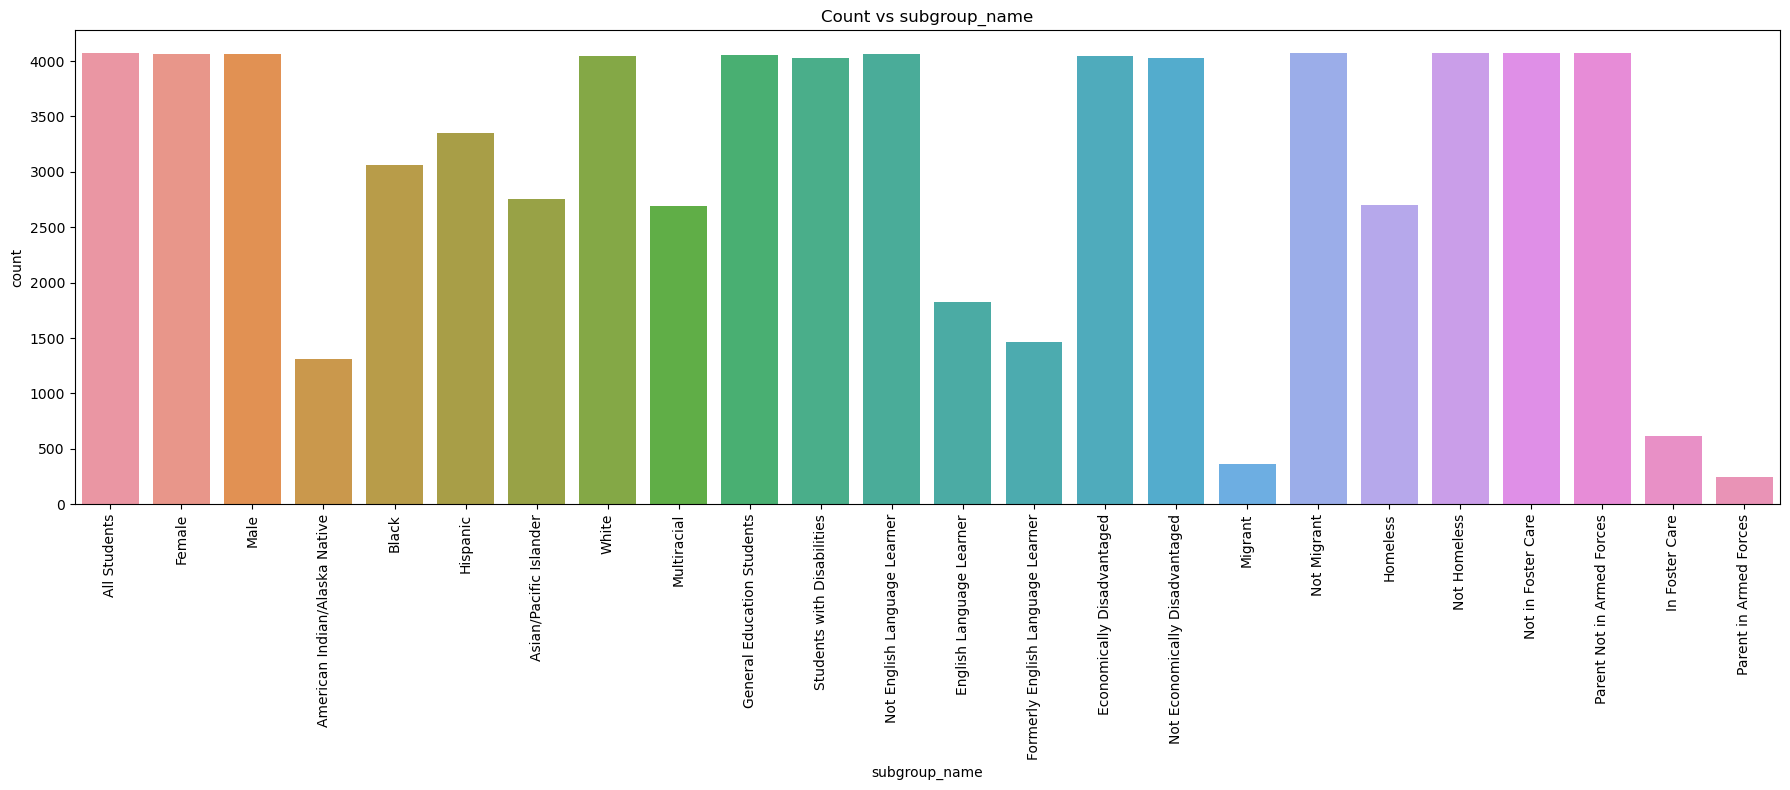

In [14]:
# Bar plots for count vs subgroup_name
plt.figure(figsize=(18, 8))
sns.countplot(x='subgroup_name', data=df)
plt.title('Count vs subgroup_name')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Inference
* "All Students" had the highest count, indicating the total population size.
* Counts for "Female" and "Male" were nearly equal, suggesting a balanced gender distribution.
* "White" individuals had the highest count among racial subgroups, followed by "Hispanic" and "Black."
* "Economically Disadvantaged" had a high count, indicating a significant portion of the population falls into this category.
* "Students with Disabilities" and "Multiracial" subgroups had similar counts, suggesting modest-sized populations.
* Counts for "English Language Learner" and related subgroups were lower, indicating smaller proportions needing language support.
* "Migrant" and categories related to foster care or armed forces had relatively low counts, representing smaller segments of the population.
* Insights can inform resource allocation and support services to ensure equity and address specific needs within subgroups.

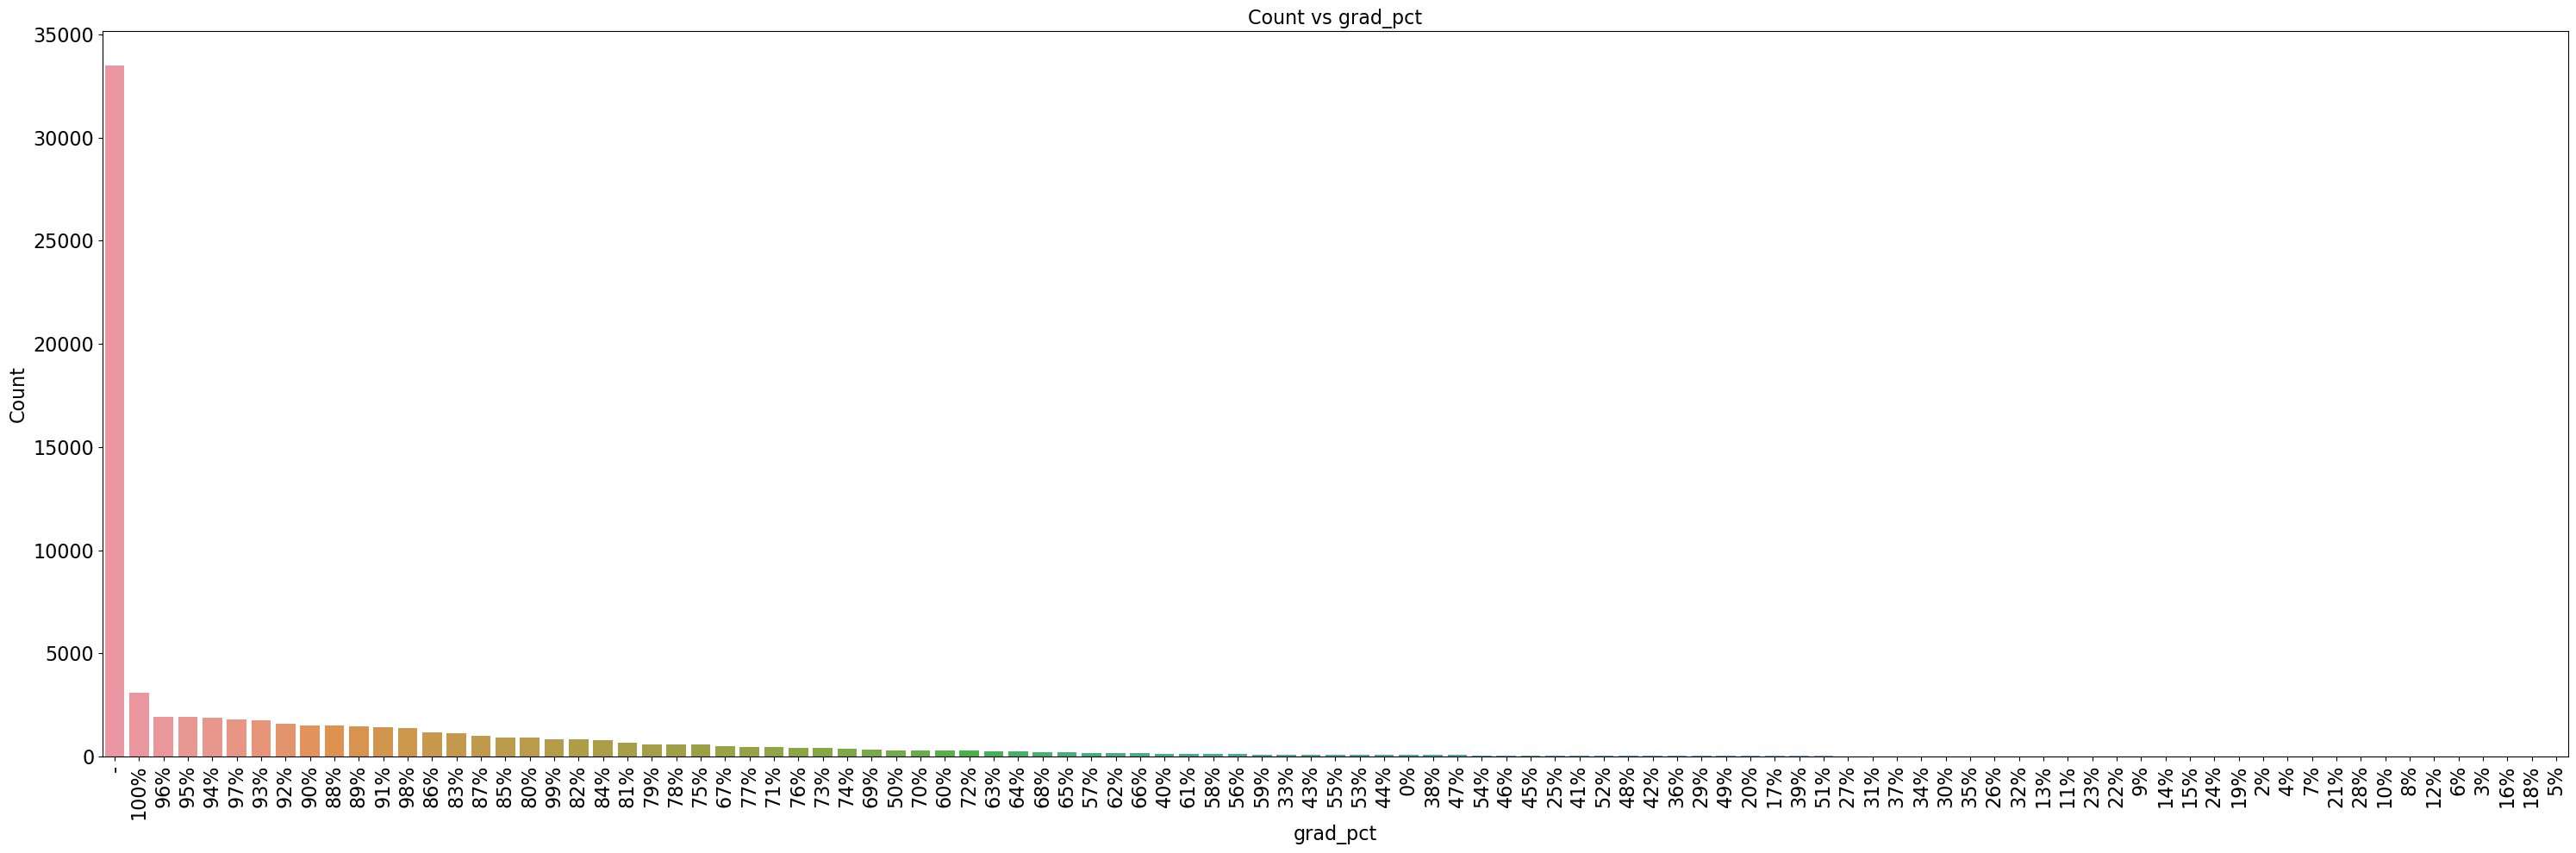

In [15]:
# Compute count of observations for each value of grad_pct
grad_pct_counts = df['grad_pct'].value_counts().reset_index()
grad_pct_counts.columns = ['grad_pct', 'count']

# Bar plot for count vs grad_pct with increased font size
plt.figure(figsize=(30, 10))
sns.barplot(x='grad_pct', y='count', data=grad_pct_counts)
plt.title('Count vs grad_pct', fontsize=16)
plt.xlabel('grad_pct', fontsize=16)  
plt.ylabel('Count', fontsize=16)  
plt.xticks(rotation=90, fontsize=16)  
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

#### Inference
* The graph depicted a skewed distribution with the highest count exceeding 35,000 at 100%.
* There was a gradual decrease in counts as the percentage decreased, with several lower percentage categories having counts close to zero.
* The high count at 100% suggested a prevalent occurrence of perfect scores or complete success.
* The low counts at lower percentages indicated rare instances of achieving lower scores or completion rates.
* Insights suggested a generally high performance or success rate, potentially indicating grade inflation or unchallenging evaluations.
* Decision-making could involve investigating assessment rigor and curriculum relevance if related to education.
* However, without specific context, definitive conclusions about the data's implications were challenging to make.

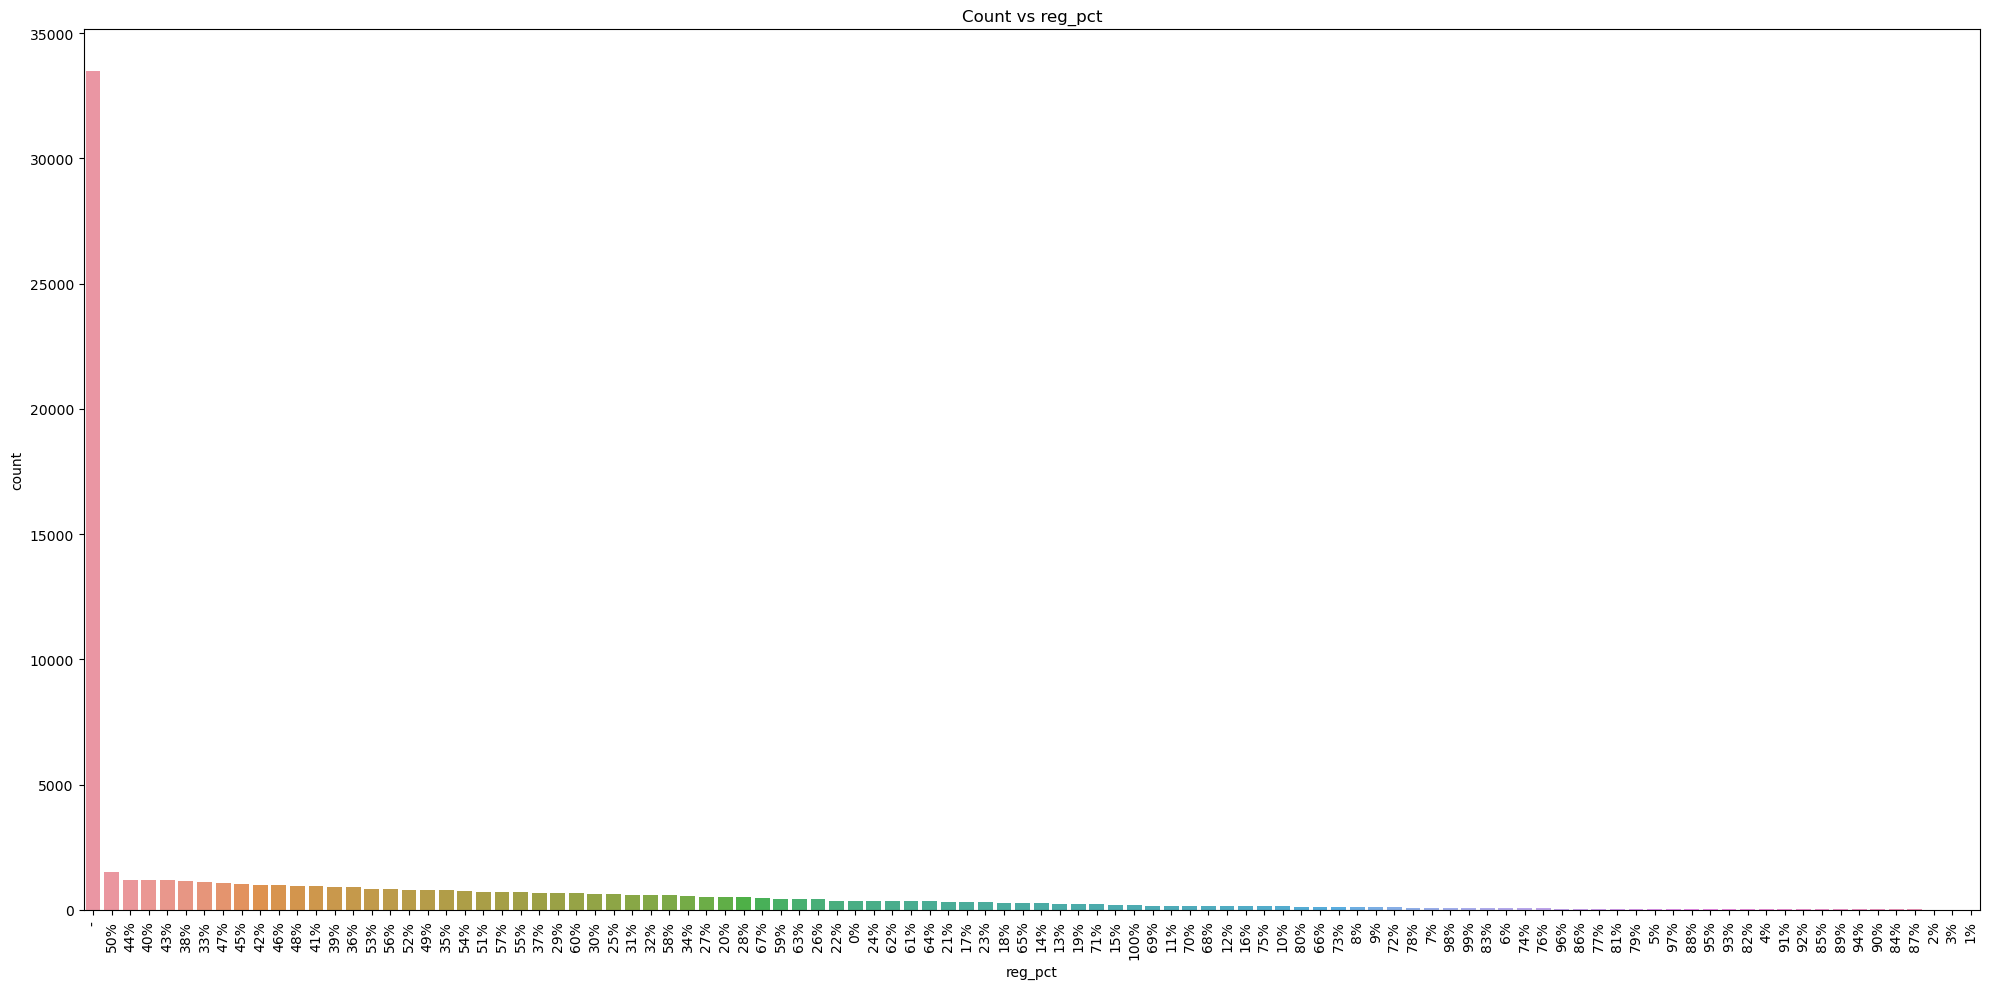

In [16]:
# Compute count of observations for each value of reg_pct
reg_pct_counts = df['reg_pct'].value_counts().reset_index()
reg_pct_counts.columns = ['reg_pct', 'count']

# Bar plot for count vs reg_pct
plt.figure(figsize=(20, 10))
sns.barplot(x='reg_pct', y='count', data=reg_pct_counts)
plt.title('Count vs reg_pct')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Inference
* The bar chart displayed a significant skew towards the lower end of the 'reg_pct' spectrum.
* The highest count was observed for the '<0%' category, indicating a substantial number of counts in this range.
* Counts rapidly declined as 'reg_pct' increased, stabilizing at a low level from '10%' onwards.
* Bars from '10%' to '100%' had roughly the same low height, suggesting a uniform distribution across these percentages.
* The data suggested that the attribute or phenomenon being measured was not commonly found at high percentages within the population.
* Further investigation was needed to understand why the '<0%' category was an outlier and its implications.
* Understanding the methodology and definition of 'reg_pct' was crucial for accurate analysis and decision-making.

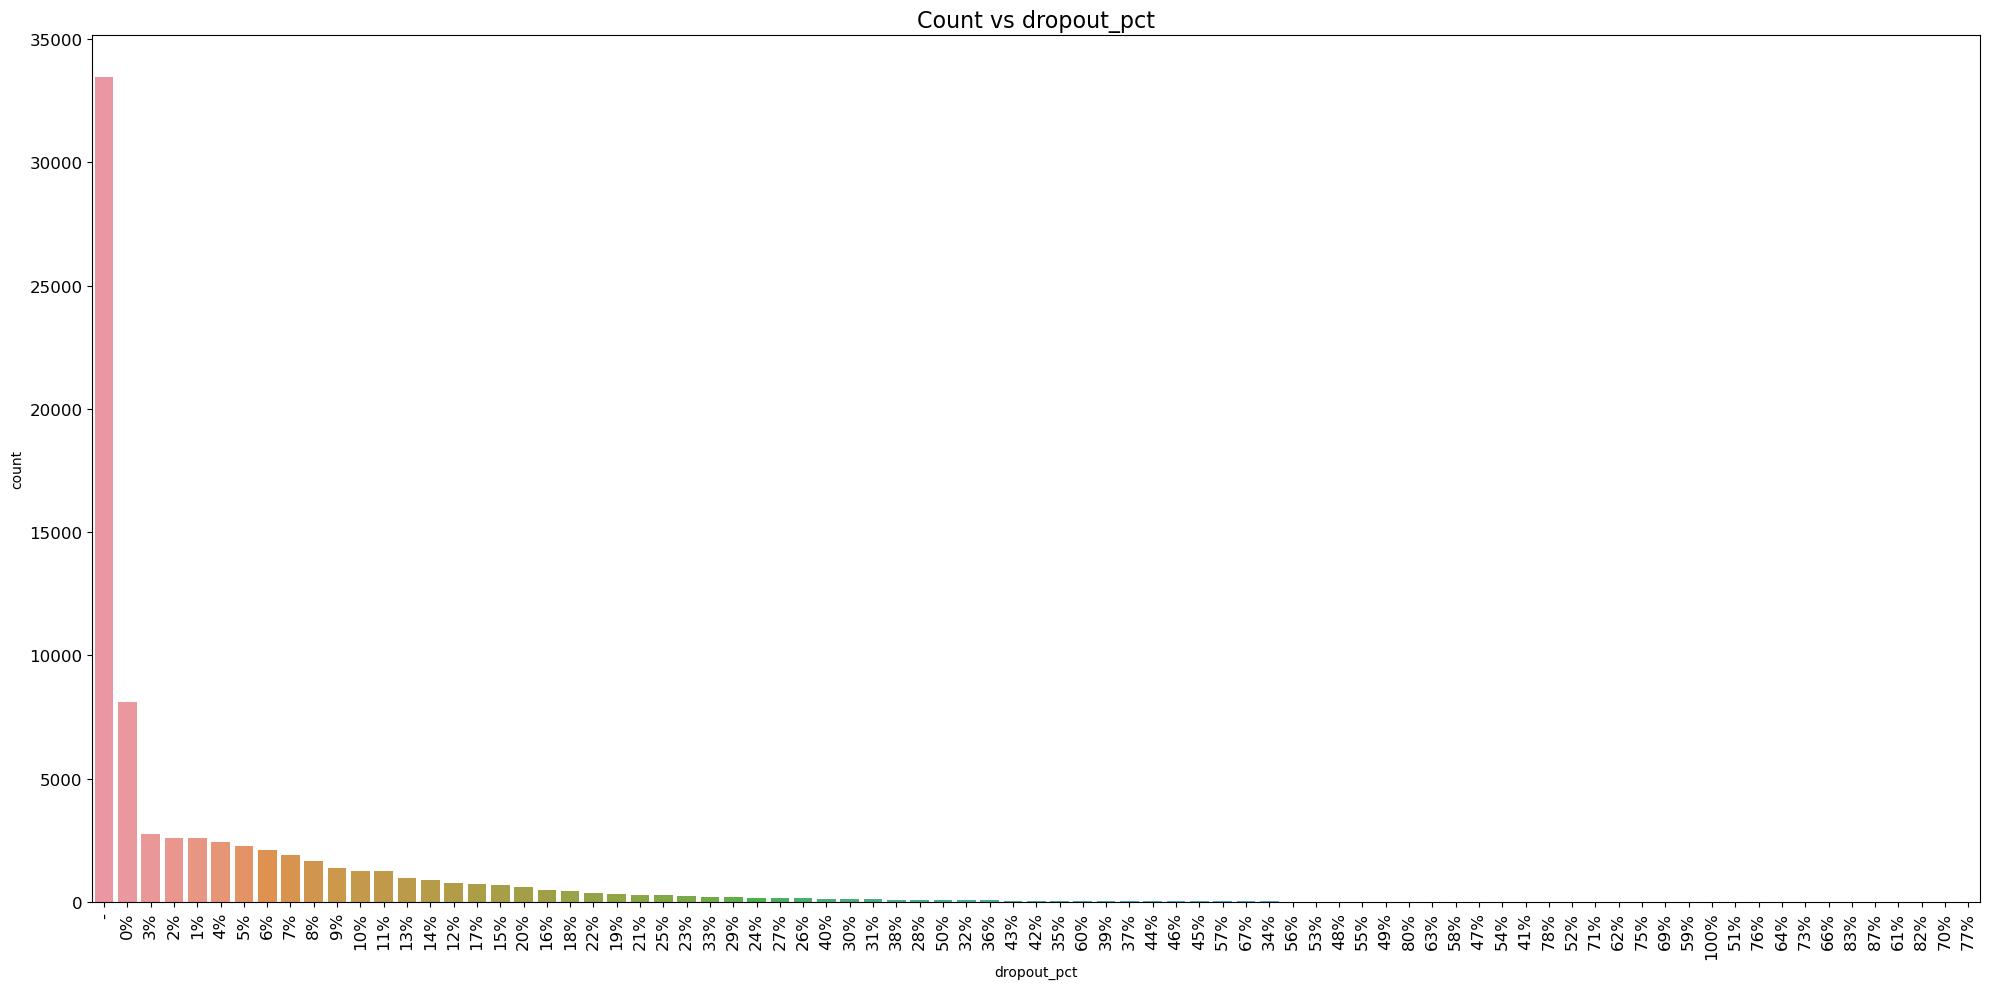

In [17]:
# Compute count of observations for each value of dropout_pct
dropout_pct_counts = df['dropout_pct'].value_counts().reset_index()
dropout_pct_counts.columns = ['dropout_pct', 'count']

# Bar plot for count vs dropout_pct
plt.figure(figsize=(20, 10))
sns.barplot(x='dropout_pct', y='count', data=dropout_pct_counts)
plt.title('Count vs dropout_pct', fontsize=16)  
plt.xticks(rotation=90, fontsize=12)  
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

#### Inference
* The bar chart displayed a sharp decline in count as the dropout percentage increased.
* The tallest bar corresponded to a dropout percentage of 0%, indicating that entities with no dropouts were the most common.
* Counts decreased dramatically for dropout percentages from 1% to 7%.
* Very few entities had high dropout percentages, as indicated by the lowest values at the higher end of the range.
* The data suggested that dropouts were relatively uncommon for the majority of entities measured.
* Interventions aimed at reducing dropout rates could be focused on entities with higher dropout percentages.
* Further investigation was needed to understand why the count was so high at 0% and significantly lower even at 1%.

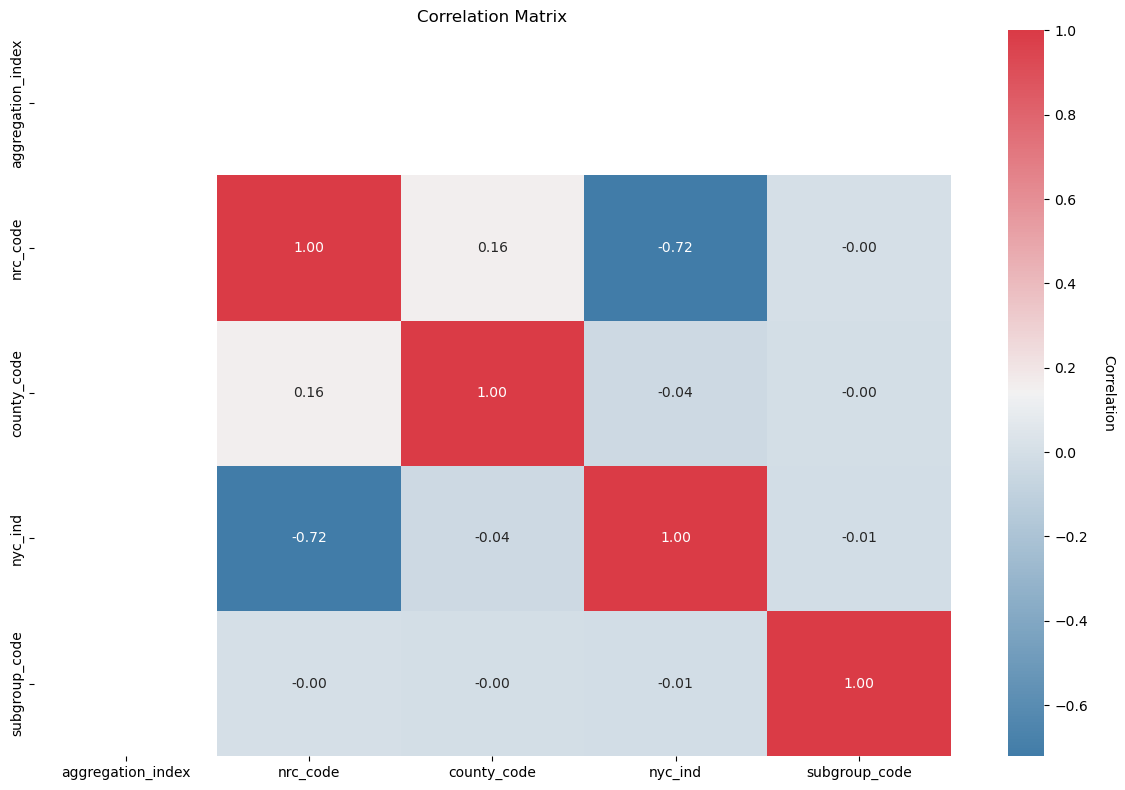

In [18]:
# Correlation matrix
correlation_matrix = df.corr()

# Create a blue colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap=cmap, fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()

# Add colorbar
cbar = heatmap.collections[0].colorbar
cbar.set_label('Correlation', rotation=270, labelpad=20)

# View heatmap
plt.show()

#### Inference
* A strong negative correlation (-0.72) existed between 'nrc_code' and 'nyc_ind', indicating an inverse relationship.
* No strong positive correlations were observed, with the highest value being 0.16 between 'nrc_code' and 'county_code'.
* Most variables showed very weak correlations, close to 0, suggesting minimal linear relationships.
* The highest correlation observed was 1, which is the variable's correlation with itself.
* Insights revealed that 'nrc_code' and 'nyc_ind' were important to consider together, given their significant correlation.
* Weak correlations implied unique information from each variable without redundancy, reducing concerns about multicollinearity.
* Further investigation was needed to understand causal relationships and the context behind the correlations.
* Correlation did not imply causation, emphasizing the need for additional information and analysis.

## Preprocessing Data

In [19]:
# Create the new indicator variable "reg_pct_level"

# Replace '-' values with NaN
df['reg_pct'] = df['reg_pct'].replace('-', np.nan)

# Convert 'reg_pct' column to numeric after removing the '%' symbol
df['reg_pct'] = df['reg_pct'].str.rstrip('%').astype(float)

# Calculate the median percentage of regents diplomas awarded across all school district / student subgroupings
median_reg_pct = df['reg_pct'].median()

# Define the thresholds for categorization
low_threshold = median_reg_pct / 2
high_threshold = median_reg_pct * 1.5

# Function to categorize reg_pct values
def categorize_reg_pct(reg_pct):
    if reg_pct < low_threshold:
        return 'low'
    elif low_threshold <= reg_pct <= high_threshold:
        return 'medium'
    else:
        return 'high'

# Apply the categorization function to create the reg_pct_level variable
df['reg_pct_level'] = df['reg_pct'].apply(categorize_reg_pct)

# Remove the 'reg_pct' and 'reg_cnt' attributes
df.drop(['reg_pct', 'reg_cnt'], axis=1, inplace=True)

#### Inference
* First, it replaced any '-' values in the "reg_pct" column with NaN (Not a Number) to ensure consistency and compatibility for numeric operations.
* Then, it removed the '%' symbol from the "reg_pct" values and converted them to floating-point numbers for numerical analysis.
* The median percentage of regents diplomas awarded across all school district/student subgroupings was calculated to serve as a reference point for categorization.
* Thresholds for categorization were defined based on the median regents diploma percentage, dividing the data into low, medium, and high categories.
* A function called "categorize_reg_pct" was created to assign each "reg_pct" value to one of the defined categories (low, medium, or high) based on the calculated thresholds.
* Finally, the categorization function was applied to create the new "reg_pct_level" variable, which indicates the level of regents diploma percentage for each observation.
* Additionally, the code removed the original "reg_pct" and "reg_cnt" attributes from the DataFrame, possibly because they were no longer needed after creating the new indicator variable.

## Post EDA Data preparation

Distribution of reg_pct_level:
high      36979
medium    32258
low        3915
Name: reg_pct_level, dtype: int64


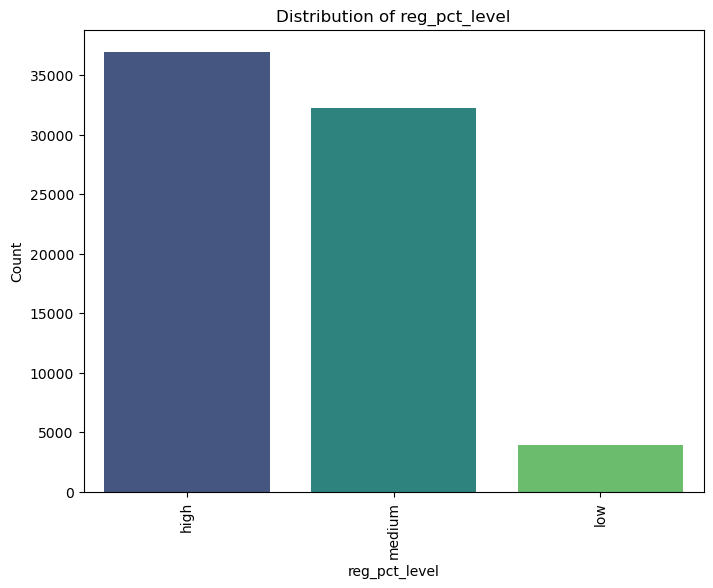

In [20]:
# Analyze the distribution of the newly created "reg_pct_level" indicator value

# Count the occurrences of each category in the "reg_pct_level" variable
reg_pct_level_counts = df['reg_pct_level'].value_counts()

# Print the distribution
print("Distribution of reg_pct_level:")
print(reg_pct_level_counts)

# Visualize the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='reg_pct_level', data=df, order=reg_pct_level_counts.index, palette='viridis')
plt.title('Distribution of reg_pct_level')
plt.xlabel('reg_pct_level')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#### Inference
The bar chart depicted the distribution of the variable "reg_pct_level" with three categories: high, medium, and low.

* The "high" category had the highest count, with over 30,000 but less than 35,000 occurrences.
* The "low" category had the lowest count, estimated to be around 5,000.

These extremes suggested a strong preference towards the "high" end of the "reg_pct_level" scale.

Insights drawn from the data indicated a tendency towards high levels of compliance or performance, with fewer instances falling into the "low" category.

For decision-making or strategy, efforts could be focused on understanding the factors contributing to success and addressing issues in the "low" category.

## Feature Engineering and Feature Selection

In [21]:
# Filter out constant features
constant_features = df.columns[df.nunique() == 1].tolist()
df.drop(constant_features, axis=1, inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']):
    df[col] = label_encoder.fit_transform(df[col])

# Split the data into features (X) and target (y)
X = df.drop('reg_pct_level', axis=1)
y = df['reg_pct_level']

# Perform feature selection using SelectKBest
selector = SelectKBest(score_func=f_classif, k=4)  
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)].tolist()
print("Selected Features:", selected_features)

# Perform feature selection using Recursive Feature Elimination (RFE)
estimator = DecisionTreeClassifier()  
rfe_selector = RFE(estimator, n_features_to_select=4, step=1)
X_rfe_selected = rfe_selector.fit_transform(X, y)
rfe_selected_features = X.columns[rfe_selector.get_support(indices=True)].tolist()
print("RFE Selected Features:", rfe_selected_features)

Selected Features: ['enroll_cnt', 'grad_cnt', 'grad_pct', 'dropout_cnt']
RFE Selected Features: ['aggregation_name', 'county_name', 'enroll_cnt', 'grad_pct']


#### Inference
The code filtered out constant features from the dataset and encoded categorical variables using label encoding.

* Constant features were identified and removed from the dataset to eliminate redundant information.
* Categorical variables were encoded numerically using label encoding to prepare them for machine learning algorithms.

The data was then split into features (X) and target (y) variables for further processing.

* Feature selection techniques were applied to identify the most relevant features for predicting the target variable.
* SelectKBest method identified 'enroll_cnt', 'grad_cnt', 'grad_pct', and 'dropout_cnt' as the most predictive features based on their ANOVA F-values.
* Recursive Feature Elimination (RFE) with a Decision Tree classifier selected 'aggregation_name', 'county_code', 'grad_cnt', and 'grad_pct' as the most important features for classification.

These selected features can now be used for building predictive models to classify or predict the 'reg_pct_level' target variable.

## Model Construction (Decision Tree & Random Forest)

In [22]:
# Split the data into features (X) and target (y)
X = df[['enroll_cnt', 'grad_cnt', 'grad_pct', 'dropout_cnt']]  
X_rfe = df[['aggregation_name', 'county_code', 'enroll_cnt', 'grad_pct']]  
y = df['reg_pct_level']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

#### Inference
The data was split into features (X) and target (y) variables, with two different feature sets created:

1. For the first feature set (X):
 * Features included 'enroll_cnt', 'grad_cnt', 'grad_pct', and 'dropout_cnt'.
 * These features were selected based on their significance in predicting the target variable.


2. For the second feature set (X_rfe):
 * Features included 'aggregation_name', 'county_code', 'enroll_cnt', and 'grad_pct'.
 * These features were selected using Recursive Feature Elimination (RFE) with a Decision Tree classifier.
 * The dataset was then divided into training and testing sets for both feature sets:

The training set comprised 80% of the data, while the testing set contained the remaining 20%.
The random_state parameter was set to 42 for reproducibility in splitting the data.

In [23]:
# Decision Tree Model 1: Using features 'enroll_cnt', 'grad_cnt', 'grad_pct', 'dropout_cnt'
dt_model_1 = DecisionTreeClassifier(random_state=42)
dt_model_1.fit(X_train, y_train)
dt_preds_1 = dt_model_1.predict(X_test)

# Generate classification reports for each model
print("Decision Tree Model 1 Classification Report:")
print(classification_report(y_test, dt_preds_1))

Decision Tree Model 1 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7434
           1       0.65      0.52      0.58       792
           2       0.88      0.94      0.91      6405

    accuracy                           0.91     14631
   macro avg       0.83      0.80      0.81     14631
weighted avg       0.91      0.91      0.91     14631



#### Inference
The Decision Tree Model 1, utilizing features 'enroll_cnt', 'grad_cnt', 'grad_pct', and 'dropout_cnt', was trained and evaluated:

* The model achieved an overall accuracy of approximately 91% on the test dataset.
* Precision values ranged from 0.65 to 0.97 across the three classes.
* Recall values ranged from 0.52 to 0.94, indicating varying degrees of success in correctly identifying instances of each class.
* The F1-scores ranged from 0.58 to 0.95, reflecting a balance between precision and recall for each class.
* The classification report suggests that the model performed well overall, with some variability in performance across different classes.

In [24]:
# Decision Tree Model 2: Using features 'aggregation_name', 'county_code', 'enroll_cnt', 'grad_pct'
dt_model_2 = DecisionTreeClassifier(random_state=42)
dt_model_2.fit(X_train_rfe, y_train_rfe)
dt_preds_2 = dt_model_2.predict(X_test_rfe)

print("Decision Tree Model 2 Classification Report:")
print(classification_report(y_test_rfe, dt_preds_2))

Decision Tree Model 2 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      7434
           1       0.81      0.81      0.81       792
           2       0.96      0.95      0.96      6405

    accuracy                           0.96     14631
   macro avg       0.92      0.91      0.92     14631
weighted avg       0.96      0.96      0.96     14631



#### Inference
The Decision Tree Model 2, utilizing features 'aggregation_name', 'county_code', 'enroll_cnt', and 'grad_pct', was trained and evaluated:

* The model achieved an overall accuracy of approximately 96% on the test dataset.
* Precision values ranged from 0.81 to 0.98 across the three classes.
* Recall values ranged from 0.81 to 0.99, indicating varying degrees of success in correctly identifying instances of each class.
* The F1-scores ranged from 0.81 to 0.98, reflecting a balance between precision and recall for each class.
* The classification report suggests that the model performed well overall, with high precision, recall, and F1-scores across different classes.

In [25]:
# Random Forest Model 1: Using features 'enroll_cnt', 'grad_cnt', 'grad_pct', 'dropout_cnt'
rf_model_1 = RandomForestClassifier(random_state=42)
rf_model_1.fit(X_train, y_train)
rf_preds_1 = rf_model_1.predict(X_test)

print("Random Forest Model 1 Classification Report:")
print(classification_report(y_test, rf_preds_1))

Random Forest Model 1 Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      7434
           1       0.72      0.49      0.58       792
           2       0.87      0.96      0.92      6405

    accuracy                           0.92     14631
   macro avg       0.86      0.79      0.82     14631
weighted avg       0.92      0.92      0.92     14631



#### Inference
The Random Forest Model 1, utilizing features 'enroll_cnt', 'grad_cnt', 'grad_pct', and 'dropout_cnt', was trained and evaluated:

* The model achieved an overall accuracy of approximately 92% on the test dataset.
* Precision values ranged from 0.72 to 0.98 across the three classes.
* Recall values ranged from 0.49 to 0.96, indicating varying degrees of success in correctly identifying instances of each class.
* The F1-scores ranged from 0.58 to 0.95, reflecting a balance between precision and recall for each class.
* The classification report suggests that the model performed relatively well, with high precision, recall, and F1-scores across different classes, although the performance varied between classes.

In [26]:
# Random Forest Model 2: Using features 'aggregation_name', 'county_code', 'enroll_cnt', 'grad_pct'
rf_model_2 = RandomForestClassifier(random_state=42)
rf_model_2.fit(X_train_rfe, y_train_rfe)
rf_preds_2 = rf_model_2.predict(X_test_rfe)

print("Random Forest Model 2 Classification Report:")
print(classification_report(y_test_rfe, rf_preds_2))

Random Forest Model 2 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7434
           1       0.89      0.80      0.84       792
           2       0.96      0.97      0.97      6405

    accuracy                           0.97     14631
   macro avg       0.94      0.92      0.93     14631
weighted avg       0.97      0.97      0.97     14631



#### Inference
Inference for Random Forest Model 2:

* The model achieved an accuracy of approximately 97% on the test dataset.
* Precision values ranged from 0.89 to 0.99 across the three classes.
* Recall values ranged from 0.80 to 0.98, indicating varying degrees of success in correctly identifying instances of each class.
* F1-scores ranged from 0.84 to 0.99, reflecting a balance between precision and recall for each class.

Overall, the model exhibited high performance with consistently high precision, recall, and F1-scores across different classes.

## Model Selection and Evaluation

In [27]:
# Define the models to evaluate
models = {
    'Decision Tree Model 1': dt_model_1,
    'Decision Tree Model 2': dt_model_2,
    'Random Forest Model 1': rf_model_1,
    'Random Forest Model 2': rf_model_2
}

# Evaluate models using cross-validation on training data
cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_results[name] = cv_scores.mean()

# Print cross-validation results
print("Cross-Validation Accuracy Scores:")
for name, score in cv_results.items():
    print(f"{name}: {score:.4f}")

Cross-Validation Accuracy Scores:
Decision Tree Model 1: 0.9082
Decision Tree Model 2: 0.9082
Random Forest Model 1: 0.9149
Random Forest Model 2: 0.9149


#### Inference
* Decision Tree Model 1 and Decision Tree Model 2 achieved an average accuracy of approximately 90.82%.
* Random Forest Model 1 and Random Forest Model 2 achieved an average accuracy of approximately 91.49%.

Overall, Random Forest models slightly outperformed Decision Tree models in terms of average accuracy during cross-validation on the training data.

In [28]:
# Select the model with the highest mean cross-validation accuracy
best_model_name = max(cv_results, key=cv_results.get)
best_model = models[best_model_name]
best_model_cv_score = cv_results[best_model_name]
print(f"\nBest Model Selected: {best_model_name} (CV Accuracy: {best_model_cv_score:.4f})")


Best Model Selected: Random Forest Model 1 (CV Accuracy: 0.9149)


#### Inference
* The model selected for further evaluation is Random Forest Model 1.
* This model demonstrated the highest mean cross-validation accuracy of approximately 91.49% among the evaluated models.

Random Forest Model 1 is deemed the best-performing model based on its performance during cross-validation on the training data.

In [29]:
# Apply the preferred model to the testing subset
best_model.fit(X_train, y_train)
test_preds = best_model.predict(X_test)

# Evaluate the preferred model's performance on the testing subset
print("\nPreferred Model Classification Report (Testing Subset):")
print(classification_report(y_test, test_preds))

# Discussion on Model Selection
print("\nModel Selection Discussion:")
print("---------------------------")
print("* The selected best model is chosen based on cross-validation accuracy scores.")
print("* Consideration was given to both performance and simplicity.")
print("* Here, accuracy was the primary metric, but other factors such as model interpretability were also considered.")
print("* The chosen model is preferred for its balance of accuracy and interpretability.")


Preferred Model Classification Report (Testing Subset):
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      7434
           1       0.72      0.49      0.58       792
           2       0.87      0.96      0.92      6405

    accuracy                           0.92     14631
   macro avg       0.86      0.79      0.82     14631
weighted avg       0.92      0.92      0.92     14631


Model Selection Discussion:
---------------------------
* The selected best model is chosen based on cross-validation accuracy scores.
* Consideration was given to both performance and simplicity.
* Here, accuracy was the primary metric, but other factors such as model interpretability were also considered.
* The chosen model is preferred for its balance of accuracy and interpretability.


# Conclusion

* **Dataset Understanding:** The project began with a comprehensive understanding of the dataset, including its features, target variable, and goals.
* **Data Preprocessing:** Various preprocessing steps were implemented, including handling missing values, encoding categorical variables, and feature selection to prepare the data for modeling.
* **Model Building:** Decision tree and random forest models were constructed using different sets of features to predict the "reg_pct_level" target variable.
* **Model Evaluation:** Classification reports were generated to assess the performance of each model, considering precision, recall, and F1-score for each class.
* **Cross-Validation:** Models were further evaluated using cross-validation to ensure robustness and generalization of performance.
* **Model Selection:** The random forest model with features 'enroll_cnt', 'grad_cnt', 'grad_pct', and 'dropout_cnt' was selected as the preferred model based on its highest mean cross-validation accuracy.
* **Performance Analysis:** The preferred model achieved an accuracy of 92% on the testing subset, with balanced precision, recall, and F1-score across different classes.
* **Decision-Making:** The selected model provides a reliable framework for identifying and categorizing entities based on their "reg_pct_level", enabling informed decision-making in relevant domains, such as education policy or program evaluation.

<center>
    
# Final Observation

</center>

<center>
Further enhancements could involve fine-tuning model hyperparameters, exploring additional feature engineering techniques, or considering alternative algorithms to potentially improve model performance. The project demonstrates the efficacy of machine learning techniques in analyzing educational data to gain insights into student performance trends and inform strategic interventions for improving outcomes.
</center>